#DOGGY DOOR - A personalized door that only lets in your dog
##Transfer Learning (VGG16)
##Dataset : https://www.kaggle.com/c/dogs-vs-cats

In [1]:
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import numpy as np

#Preparing dataset (training and validation)

In [ ]:
BATCH_SIZE = 16

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Training set

In [ ]:
train_data = '/content/drive/MyDrive/Colab_Notebooks/DL/Projects/Classification/Cats_and_Dogs/Datasets/train'
train_datagen = keras.preprocessing.image.ImageDataGenerator()
training_set = train_datagen.flow_from_directory(train_data, batch_size=BATCH_SIZE, class_mode='binary')

Found 2000 images belonging to 2 classes.


##Validation set

In [ ]:
validation_data = '/content/drive/MyDrive/Colab_Notebooks/DL/Projects/Classification/Cats_and_Dogs/Datasets/validation'
validation_datagen = keras.preprocessing.image.ImageDataGenerator()
validation_set = validation_datagen.flow_from_directory(validation_data, batch_size=BATCH_SIZE, class_mode='binary')

Found 1000 images belonging to 2 classes.


#Building the model

In [ ]:
IMAGE_SIZE = 224

##Base model (VGG16)

In [ ]:
#create the base model from the pre-trained VGG16 model with ANN part removed
vgg16 = VGG16(input_shape=[IMAGE_SIZE]+[IMAGE_SIZE]+[3], weights='imagenet', include_top=False)

#freeze the convolutional base
for layer in vgg16.layers:
  layer.trainable = False

#base model summary
vgg16.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

##Base model (VGG16) + Our layers

In [ ]:
#initialising the model
model_vgg16 = keras.models.Sequential()

#Input layer
model_vgg16.add(keras.layers.Input(shape=(None, None, 3)))

#Resizing layer
model_vgg16.add(keras.layers.experimental.preprocessing.Resizing(height=IMAGE_SIZE, width=IMAGE_SIZE))

#Rescaling layer
model_vgg16.add(keras.layers.experimental.preprocessing.Rescaling(scale=1./255))

#Data augmentation layers
model_vgg16.add(keras.layers.experimental.preprocessing.RandomRotation(0.2))
model_vgg16.add(keras.layers.experimental.preprocessing.RandomZoom(0.2))
model_vgg16.add(keras.layers.experimental.preprocessing.RandomFlip(mode="horizontal"))

#Base model
model_vgg16.add(vgg16)  

#Flatten
model_vgg16.add(keras.layers.Flatten()) 

#Hidden layer
model_vgg16.add(keras.layers.Dense(units=256, activation='relu', kernel_initializer='he_uniform'))

#Dropout layer
model_vgg16.add(keras.layers.Dropout(rate=0.5))

#Output layer
model_vgg16.add(keras.layers.Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform')) 

#compiling the model
model_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#view the structure of the model
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 224, 224, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 224, 224, 3)       0         
_________________________________________________________________
random_flip (RandomFlip)     (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

#Training phase

In [ ]:
#training the model on the training set and evaluating it on the validation set
model_vgg16_history = model_vgg16.fit(x=training_set, validation_data=validation_set, epochs=50)

Epoch 1/50
125/125 [==============================] - 776s 6s/step - loss: 1.0725 - accuracy: 0.6468 - val_loss: 0.3832 - val_accuracy: 0.8110
Epoch 2/50
125/125 [==============================] - 15s 123ms/step - loss: 0.4579 - accuracy: 0.7935 - val_loss: 0.2925 - val_accuracy: 0.8900
Epoch 3/50
125/125 [==============================] - 15s 123ms/step - loss: 0.4666 - accuracy: 0.7852 - val_loss: 0.2664 - val_accuracy: 0.9030
Epoch 4/50
125/125 [==============================] - 15s 123ms/step - loss: 0.3866 - accuracy: 0.8274 - val_loss: 0.2654 - val_accuracy: 0.8820
Epoch 5/50
125/125 [==============================] - 16s 125ms/step - loss: 0.3961 - accuracy: 0.8378 - val_loss: 0.2391 - val_accuracy: 0.8960
Epoch 6/50
125/125 [==============================] - 16s 125ms/step - loss: 0.3917 - accuracy: 0.8201 - val_loss: 0.2243 - val_accuracy: 0.9050
Epoch 7/50
125/125 [==============================] - 16s 125ms/step - loss: 0.3662 - accuracy: 0.8265 - val_loss: 0.2251 - val_accu

##Plot the loss & accuracy

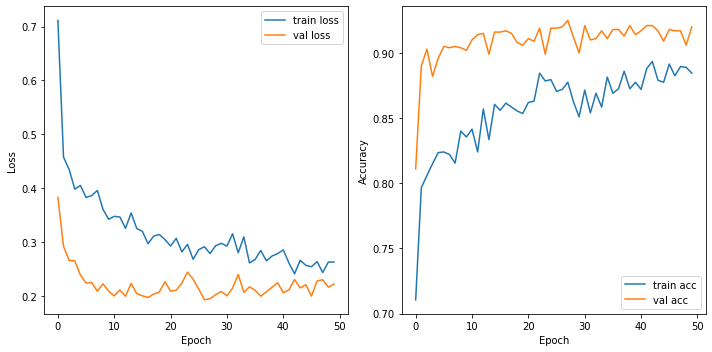

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(model_vgg16_history.history['loss'], label='train loss')
plt.plot(model_vgg16_history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(model_vgg16_history.history['accuracy'], label='train acc')
plt.plot(model_vgg16_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [ ]:
##save the trained model as a h5 file
model_vgg16.save('/content/drive/MyDrive/Colab_Notebooks/DL/Projects/Classification/Doggy_Door/model_vgg16_doggy_door.h5')

In [3]:
##load the trained model
trained_model_vgg16 = keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/DL/Projects/Classification/Doggy_Door/model_vgg16_doggy_door.h5')
trained_model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                        

#Testing phase

In [7]:
##predicting single test data
td = '/content/drive/MyDrive/Colab_Notebooks/DL/Projects/Classification/Cats_and_Dogs/Datasets/test/1.jpg'
ti = keras.preprocessing.image.load_img(td)  #image reading
ti = keras.preprocessing.image.img_to_array(ti) #(h, w, 3)
ti = np.array([ti]) #(n, h, w, 3)

#prediction
res = trained_model_vgg16.predict(ti)
if res[0] < 0.5:
  cls = 0 #Non-Dog
  print("Only DOGs are allowed")
else:
  cls = 1 #Dog
  print("Welcome")

Welcome
